- TP = mixture components both hom with different call, mixture het for same calls
- FP = mixture components both hom, and mixture het but with different call (most likely components both hom ref)
- FN = mixture components both hom with different call, mixture not het for same calls


- Calculate each of the above for each sample, broken down by appropriate coverage bands
- Do separately for SNPs and indels, PASS and fail

In [85]:
%run _standard_imports.ipynb
%run _plotting_setup.ipynb

python 3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
numpy 1.11.2
scipy 0.18.1
pandas 0.19.0
numexpr 2.6.1
pysam 0.8.4
petl 1.1.0
petlx 1.0.3
vcf 0.6.8
vcfnp 2.2.0
h5py 2.6.0
tables 3.3.0


In [2]:
hdf_fn = '/nfs/team112_internal/production/release_build/Pf3K/pilot_5_0/hdf5/Pf3K_pilot_5_0.h5'
mixtures_metadata_fn = "/nfs/team112_internal/production/release_build/Pf3K/pilot_5_0/pf3k_release_5_mixtures_metadata.txt"


In [9]:
callset = h5py.File(hdf_fn, mode='r')

In [68]:
list(callset['variants']['VariantType'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'ClippingRankSum',
 'DP',
 'DS',
 'END',
 'FILTER_Centromere',
 'FILTER_InternalHypervariable',
 'FILTER_LowQual',
 'FILTER_Low_VQSLOD',
 'FILTER_PASS',
 'FILTER_SubtelomericHypervariable',
 'FILTER_SubtelomericRepeat',
 'FILTER_VQSRTrancheINDEL99.00to99.90',
 'FILTER_VQSRTrancheINDEL99.90to100.00',
 'FILTER_VQSRTrancheINDEL99.90to100.00+',
 'FILTER_VQSRTrancheSNP99.90to100.00',
 'FILTER_VQSRTrancheSNP99.90to100.00+',
 'FS',
 'GC',
 'HaplotypeScore',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'NEGATIVE_TRAIN_SITE',
 'POS',
 'POSITIVE_TRAIN_SITE',
 'QD',
 'QUAL',
 'REF',
 'RPA',
 'RU',
 'ReadPosRankSum',
 'RegionType',
 'SNPEFF_AMINO_ACID_CHANGE',
 'SNPEFF_CODON_CHANGE',
 'SNPEFF_EFFECT',
 'SNPEFF_EXON_ID',
 'SNPEFF_FUNCTIONAL_CLASS',
 'SNPEFF_GENE_BIOTYPE',
 'SNPEFF_GENE_NAME',
 'SNPEFF_IMPACT',
 'SNPEFF_TRANSCRIPT_ID',
 'SOR',
 'STR',
 'VQSLOD',
 'VariantType',
 'culprit',
 'is_snp',
 'num_alleles',
 'set',
 '

In [70]:
np.unique(callset['variants']['is_snp'][:], return_counts=True)

(array([False,  True], dtype=bool), array([2164863, 2047602]))

In [71]:
np.unique(callset['variants']['FILTER_PASS'][:], return_counts=True)

(array([False,  True], dtype=bool), array([2277270, 1935195]))

In [4]:
tbl_mixtures = etl.fromtsv(mixtures_metadata_fn)
tbl_mixtures.displayall()

sample,acc,3D7,Dd2,HB3,7G8
PG0389-C,ERS319116,90,10,0,0
PG0390-C,ERS319119,80,20,0,0
PG0391-C,ERS319122,67,33,0,0
PG0392-C,ERS319125,33,67,0,0
PG0393-C,ERS319128,20,80,0,0
PG0394-C,ERS319130,10,90,0,0
PG0395-C,ERS319132,0,33.3,33.3,33.3
PG0396-C,ERS319134,0,25,25,50
PG0397-C,ERS319136,0,14.3,14.3,71.4
PG0398-C,ERS319138,0,0,100,0


In [8]:
clonal_samples = collections.OrderedDict()
clonal_samples['3D7'] = 'PG0051-C'  # this from 3D7xHB3 cross
clonal_samples['Dd2'] = 'PG0008-CW' # this from HB3xDd2 cross
clonal_samples['HB3'] = 'PG0004-CW' # this from HB3xDd2 cross
clonal_samples['HB3'] = 'PG0052-C'  # this from 3D7xHB3 cross
clonal_samples['HB3'] = 'PG0398-C'  # this from Jason mixture experiment
clonal_samples['7G8'] = '7G8'       # this from 7G8xGB4 cross
clonal_samples['7G8'] = 'PG0415-C'  # this from Jason mixture experiment
clonal_samples

OrderedDict([('3D7', 'PG0051-C'),
             ('Dd2', 'PG0008-CW'),
             ('HB3', 'PG0398-C'),
             ('7G8', 'PG0415-C')])

In [14]:
callset['samples'][:]

array([b'7G8', b'ERS740936', b'ERS740937', ..., b'SenV035.04',
       b'SenV042.05', b'SenV092.05'], 
      dtype='|S10')

In [15]:
clonal_samples['7G8'].encode('ascii')

b'PG0415-C'

In [82]:
%%time
ref_ads = collections.OrderedDict()
for clonal_sample in clonal_samples:
    print(clonal_sample)
    selected_sample = (callset['samples'][:] == clonal_samples[clonal_sample].encode('ascii'))
    ref_ads[callset] = callset['calldata']['AD'][:, selected_sample, :][:, :, 0]
for sample in tbl_mixtures.values('sample').array():
    print(sample)
    selected_sample = (callset['samples'][:] == sample.encode('ascii'))
    ref_ads[callset] = callset['calldata']['AD'][:, selected_sample, :][:, :, 0]
    

3D7
Dd2
HB3
7G8
PG0389-C
PG0390-C
PG0391-C
PG0392-C
PG0393-C
PG0394-C
PG0395-C
PG0396-C
PG0397-C
PG0398-C
PG0399-C
PG0400-C
PG0401-C
PG0402-C
PG0403-C
PG0404-C
PG0405-C
PG0406-C
PG0407-C
PG0408-C
PG0409-C
PG0410-C
PG0411-C
PG0412-C
PG0413-C
PG0414-C
PG0415-C
CPU times: user 16min 39s, sys: 5min 47s, total: 22min 27s
Wall time: 24min 19s


In [ ]:
%%time
alt_ads = collections.OrderedDict()
for clonal_sample in clonal_samples:
    print(clonal_sample)
    selected_sample = (callset['samples'][:] == clonal_samples[clonal_sample].encode('ascii'))
    alt_ads[callset] = callset['calldata']['AD'][:, selected_sample, :][:, :, 1]
for sample in tbl_mixtures.values('sample').array():
    print(sample)
    selected_sample = (callset['samples'][:] == sample.encode('ascii'))
    alt_ads[callset] = callset['calldata']['AD'][:, selected_sample, :][:, :, 1]
    

In [29]:
%%time
gts = collections.OrderedDict()
for clonal_sample in clonal_samples:
    print(clonal_sample)
    selected_sample = (callset['samples'][:] == clonal_samples[clonal_sample].encode('ascii'))
    gts[clonal_sample] = callset['calldata']['GT'][:, selected_sample][:,0]
for sample in tbl_mixtures.values('sample').array():
    print(sample)
    selected_sample = (callset['samples'][:] == sample.encode('ascii'))
    gts[sample] = callset['calldata']['GT'][:, selected_sample][:,0]
    

3D7
Dd2
HB3
7G8
PG0389-C
PG0390-C
PG0391-C
PG0392-C
PG0393-C
PG0394-C
PG0395-C
PG0396-C
PG0397-C
PG0398-C
PG0399-C
PG0400-C
PG0401-C
PG0402-C
PG0403-C
PG0404-C
PG0405-C
PG0406-C
PG0407-C
PG0408-C
PG0409-C
PG0410-C
PG0411-C
PG0412-C
PG0413-C
PG0414-C
PG0415-C
CPU times: user 3min 22s, sys: 57.8 s, total: 4min 20s
Wall time: 4min 17s


In [83]:
%%time
dps = collections.OrderedDict()
for clonal_sample in clonal_samples:
    print(clonal_sample)
    selected_sample = (callset['samples'][:] == clonal_samples[clonal_sample].encode('ascii'))
    dps[clonal_sample] = callset['calldata']['DP'][:, selected_sample][:,0]
for sample in tbl_mixtures.values('sample').array():
    print(sample)
    selected_sample = (callset['samples'][:] == sample.encode('ascii'))
    dps[sample] = callset['calldata']['DP'][:, selected_sample][:,0]
    

3D7
Dd2
HB3
7G8
PG0389-C
PG0390-C
PG0391-C
PG0392-C
PG0393-C
PG0394-C
PG0395-C
PG0396-C
PG0397-C
PG0398-C
PG0399-C
PG0400-C
PG0401-C
PG0402-C
PG0403-C
PG0404-C
PG0405-C
PG0406-C
PG0407-C
PG0408-C
PG0409-C
PG0410-C
PG0411-C
PG0412-C
PG0413-C
PG0414-C
PG0415-C
CPU times: user 4min 35s, sys: 58.8 s, total: 5min 34s
Wall time: 6min 10s


/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


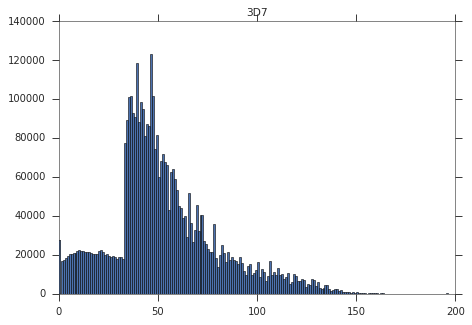

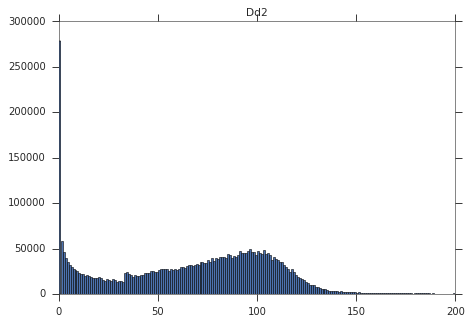

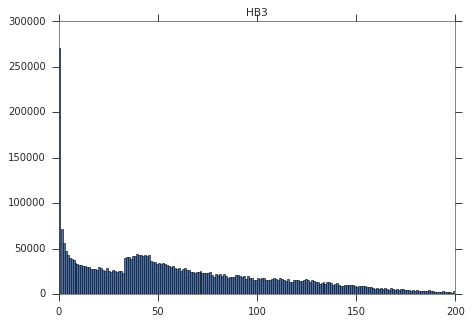

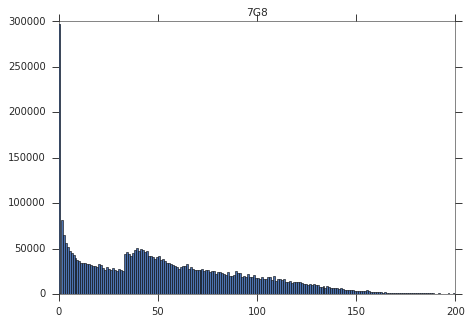

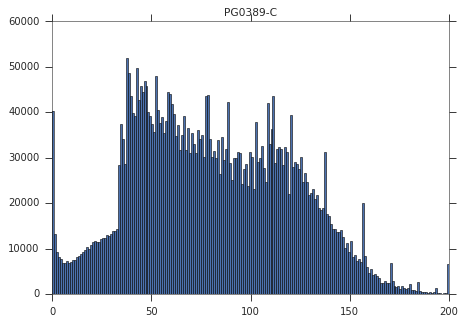

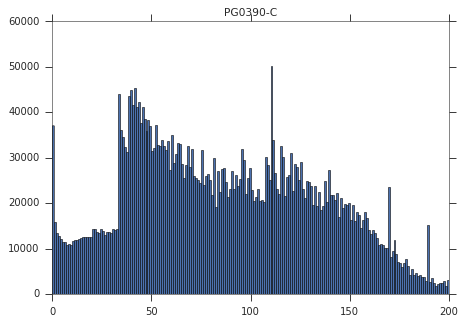

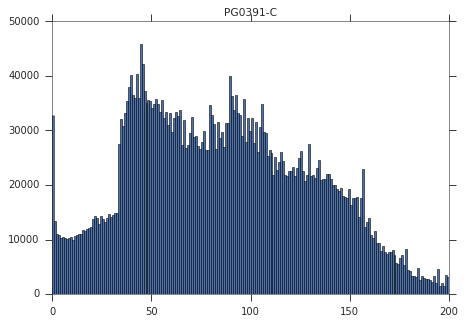

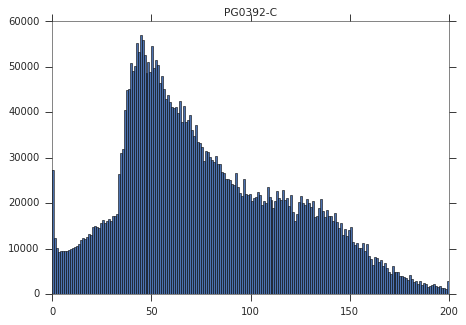

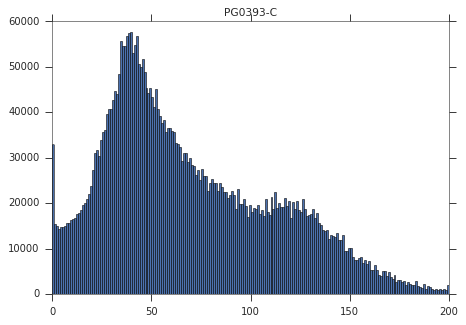

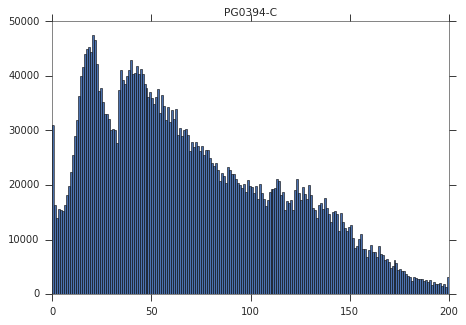

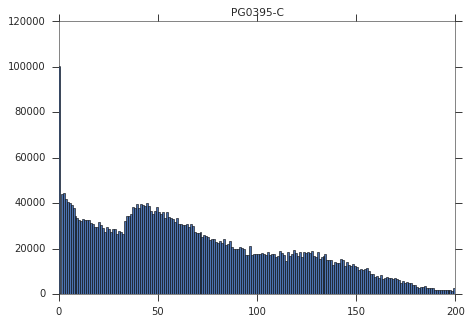

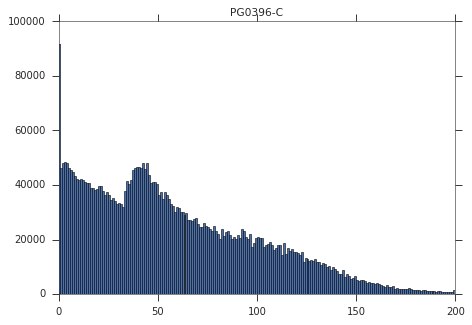

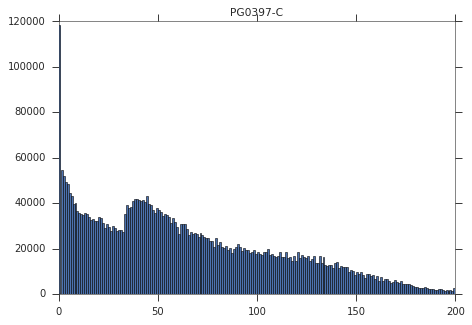

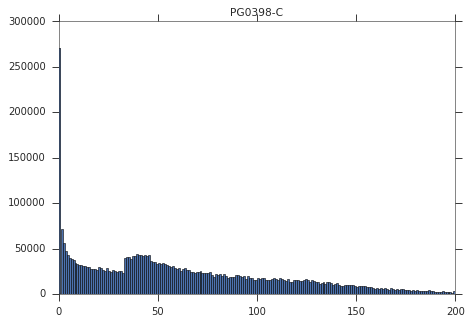

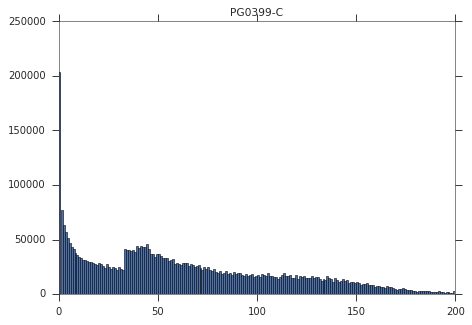

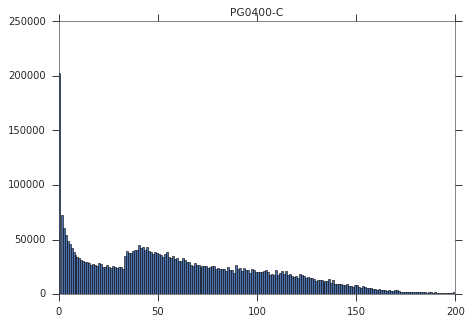

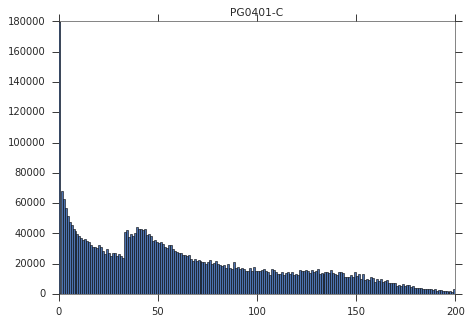

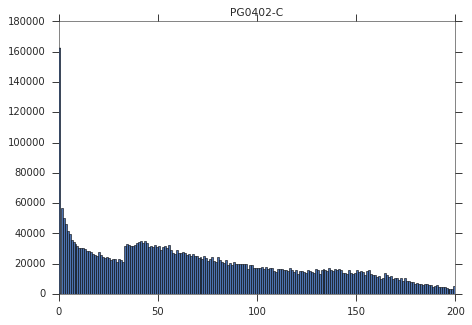

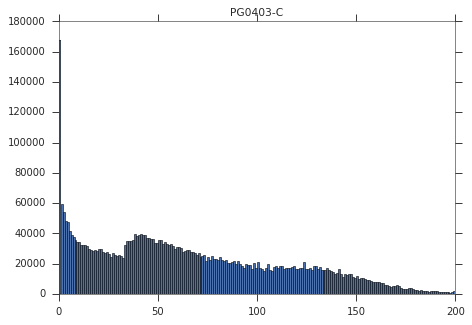

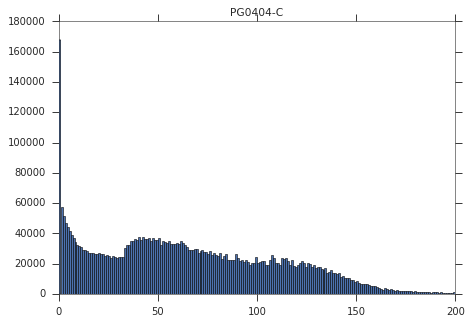

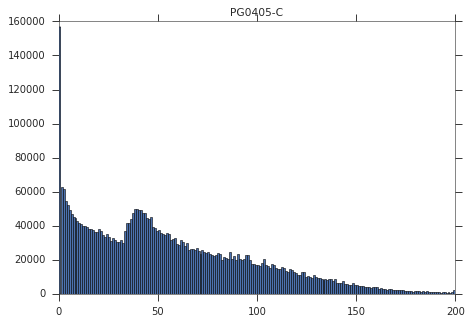

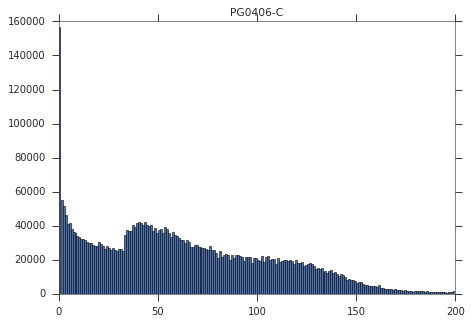

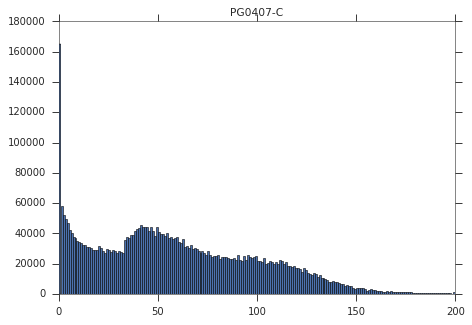

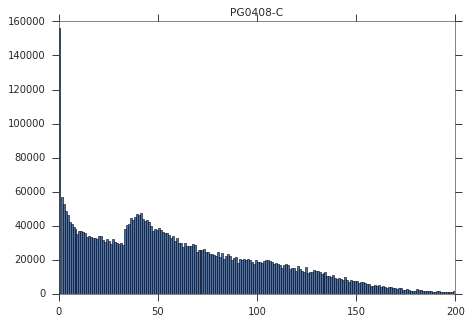

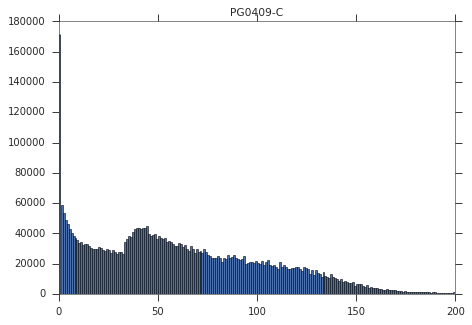

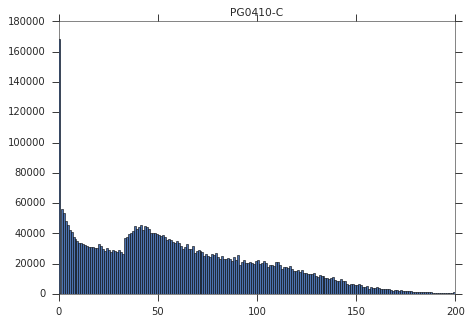

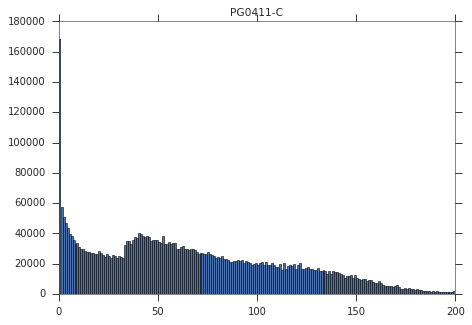

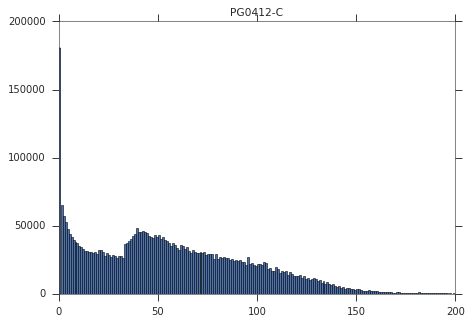

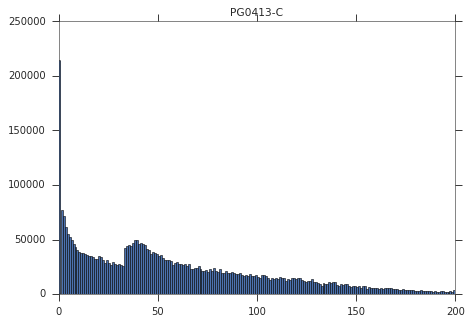

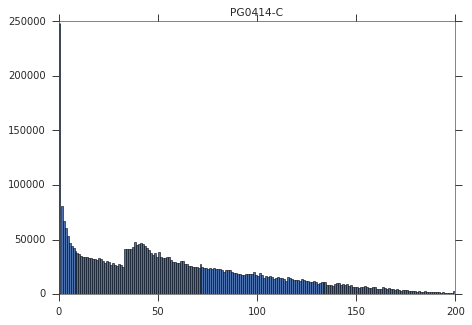

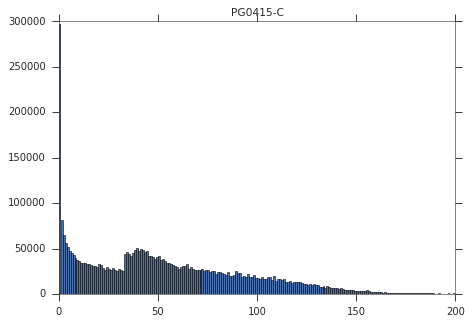

In [87]:
for sample in dps:
    fig, ax = plt.subplots()
    _ = ax.hist(dps[sample], bins=np.arange(0, 201))
    ax.set_title(sample)

In [28]:
gts['3D7'].shape

(4212465,)

In [24]:
def determine_het(gt_1, gt_2):
    gt1 = gt_1.decode('ascii')[0]
    gt2 = gt_2.decode('ascii')[0]
    if gt1 > gt2:
        return(("%s/%s" % (gt2, gt1)).encode('ascii'))
    else:
        return(("%s/%s" % (gt1, gt2)).encode('ascii'))

print(determine_het(b'0/0', b'0/1'))
print(determine_het(b'0/0', b'1/1'))
print(determine_het(b'1/1', b'0/0'))
print(determine_het(b'2/2', b'1/1'))

v_determine_het = np.vectorize(determine_het)


b'0/0'
b'0/1'
b'0/1'
b'1/2'


In [95]:
def is_het(gt):
    gt1 = gt.decode('ascii')[0]
    gt2 = gt.decode('ascii')[2]
#     gt2 = gt.decode('ascii')[2]
#     print(gt1, gt2)
    if(gt1 in ['0', '1', '2', '3', '4', '5', '6'] and gt2 in ['0', '1', '2', '3', '4', '5', '6'] and gt1 != gt2):
        return(True)
    else:
        return(False)

print(is_het(b'0/0'))
print(is_het(b'0/1'))
print(is_het(b'1/1'))
print(is_het(b'1/2'))
print(is_het(b'./.'))
print(is_het(b'./1'))


v_is_het = np.vectorize(is_het)


False
True
False
True
False
False


In [92]:
%%time
homozygous_calls = np.array([b'0/0', b'1/1', b'2/2', b'3/3', b'4/4', b'5/5', b'6/6'])
segregating_variants = collections.OrderedDict()
hom_hom_variants = collections.OrderedDict()
correct_het_call = collections.OrderedDict()
hom_hom_variants['3D7vDd2'] = (
    np.in1d(gts['3D7'], homozygous_calls) &
    np.in1d(gts['Dd2'], homozygous_calls)
)
segregating_variants['3D7vDd2'] = (
    np.in1d(gts['3D7'], homozygous_calls) &
    np.in1d(gts['Dd2'], homozygous_calls) &
    (gts['3D7'] != gts['Dd2'])
#     (gts['3D7'][:, 0] != gts['Dd2'][:, 0])
)
# correct_het_call['3D7vDd2'] = v_determine_het(gts['3D7'][:, 0], gts['Dd2'][:, 0])
correct_het_call['3D7vDd2'] = v_determine_het(gts['3D7'], gts['Dd2'])

hom_hom_variants['HB3v7G8'] = (
    np.in1d(gts['HB3'], homozygous_calls) &
    np.in1d(gts['7G8'], homozygous_calls)
)
segregating_variants['HB3v7G8'] = (
    np.in1d(gts['HB3'], homozygous_calls) &
    np.in1d(gts['7G8'], homozygous_calls) &
    (gts['HB3'] != gts['7G8'])
)
correct_het_call['HB3v7G8'] = v_determine_het(gts['HB3'], gts['7G8'])

print(np.unique(segregating_variants['3D7vDd2'], return_counts=True))
print(np.unique(correct_het_call['3D7vDd2'], return_counts=True))
print(np.unique(correct_het_call['3D7vDd2'][segregating_variants['3D7vDd2']], return_counts=True))

print(np.unique(segregating_variants['HB3v7G8'], return_counts=True))


(array([False,  True], dtype=bool), array([4092165,  120300]))
(array([b'./.', b'./0', b'./1', b'./2', b'./3', b'./4', b'./5', b'./6',
       b'0/0', b'0/1', b'0/2', b'0/3', b'0/4', b'0/5', b'0/6', b'1/1',
       b'1/2', b'1/3', b'1/4', b'1/5', b'1/6', b'2/2', b'2/3', b'2/4',
       b'2/6', b'3/3', b'3/4', b'3/5', b'5/5'], 
      dtype='|S3'), array([  14758,  444459,    3981,     816,     103,      33,      20,
             7, 3622054,  101319,   18133,    4258,    1384,     568,
           328,     131,      42,      14,       4,       4,       1,
            30,       7,       6,       1,       1,       1,       1,
             1]))
(array([b'0/1', b'0/2', b'0/3', b'0/4', b'0/5', b'0/6', b'1/2', b'1/3',
       b'1/4', b'1/5', b'2/3', b'2/4', b'2/6', b'3/4', b'3/5'], 
      dtype='|S3'), array([97317, 16943,  3857,  1288,   529,   302,    34,    10,     3,
           4,     6,     4,     1,     1,     1]))
(array([False,  True], dtype=bool), array([4093034,  119431]))
CPU times: user

In [115]:
def determine_tp_fn_fp(
    sample='PG0389-C',
    variants=(
        callset['variants']['is_snp'][:] &
        callset['variants']['FILTER_PASS'][:] &
        (dps['PG0389-C'] >= 0) &
        (dps['PG0389-C'] <= 50)
    )
):
    rec_this_sample = tbl_mixtures.selecteq('sample', sample).convertnumbers().data().list()[0]
#     print(rec_this_sample)
#     print(type(rec_this_sample))
#     print(rec_this_sample[5])

    if rec_this_sample[4] == 0 and rec_this_sample[5] == 0:
        mixture_components = '3D7vDd2'
    elif rec_this_sample[2] == 0 and rec_this_sample[3] == 0:
        mixture_components = 'HB3v7G8'
    else:
        return(rec_this_sample, np.nan, np.nan, np.nan)
#     print(sample, mixture_components)
#     print(np.unique(variants, return_counts=True))
    seg_variants = (segregating_variants[mixture_components] & variants)
    hom_variants = (hom_hom_variants[mixture_components] & variants)
    TP = np.count_nonzero(correct_het_call[mixture_components][seg_variants] == gts[sample][seg_variants])
    FN = np.count_nonzero(correct_het_call[mixture_components][seg_variants] != gts[sample][seg_variants])
    FP = np.count_nonzero(
        v_is_het(gts[sample][hom_variants]) &
        (correct_het_call[mixture_components][hom_variants] != gts[sample][hom_variants])
    )
    return(rec_this_sample, TP, FN, FP)
    


In [410]:
depths = [(0, 25), (25, 50), (50, 75), (75, 100), (100, 150), (150, 200), (200, 999999)]

df_results = pd.DataFrame(
    index=pd.MultiIndex.from_product(
#         [tbl_mixtures.values('sample').list(), [str(x) for x in depths], ['SNP', 'INDEL']],
        [tbl_mixtures.values('sample').list(), depths, ['SNP', 'INDEL']],
        names=['sample', 'depth', 'variant_type']
    ),
    columns=['TP', 'FN', 'FP', 'FNR', 'FPR', 'sample_mixture']
)
df_results = df_results.sort_index()

# df_results = pd.DataFrame({'sample' : [], '3D7': [], 'Dd2': [], 'HB3': [], '7G8': []})

for variant_type in ['SNP', 'INDEL']:
    if variant_type == 'SNP':
        variants_this_type = callset['variants']['is_snp'][:]
    else:
        variants_this_type = np.logical_not(callset['variants']['is_snp'][:])
    for sample in tbl_mixtures.values('sample'):
        for depth in depths:
            variants=(
                variants_this_type &
                callset['variants']['FILTER_PASS'][:] &
                (dps[sample] >= depth[0]) &
                (dps[sample] < depth[1])
            )
            rec_this_sample, TP, FN, FP = determine_tp_fn_fp(sample, variants)
            sample_mixture = sample
            if rec_this_sample[2] > 0:
                sample_mixture += ", %d%% 3D7" % rec_this_sample[2]
            if rec_this_sample[3] > 0:
                sample_mixture += ", %d%% Dd2" % rec_this_sample[3]
            if rec_this_sample[4] > 0:
                sample_mixture += ", %d%% HB3" % rec_this_sample[4]
            if rec_this_sample[5] > 0:
                sample_mixture += ", %d%% 7G8" % rec_this_sample[5]
#             if len(sample_mixture) > 2:
#                 sample_mixture = sample_mixture[2:]
            if (FN+TP) == 0:
                FNR = np.nan
            else:
                FNR = FN/(FN+TP)
            if (FP+TP) == 0:
                FPR = np.nan
            else:
                FPR = FP/(FP+TP)
#             print(sample, rec_this_sample[2], rec_this_sample[3], rec_this_sample[4], rec_this_sample[5],
#                   variant_type, depth, TP, FN, FP)
            df_results.loc[sample, depth, variant_type] = (TP, FN, FP, FNR, FPR, sample_mixture)
            print(sample, rec_this_sample[2], rec_this_sample[3], rec_this_sample[4], rec_this_sample[5],
                  variant_type, depth, TP, FN, FP, FNR, FPR, sample_mixture)
        

PG0389-C 90 10 0 0 SNP (0, 25) 78 37 5 0.3217391304347826 0.060240963855421686 PG0389-C, 90% 3D7, 10% Dd2
PG0389-C 90 10 0 0 SNP (25, 50) 414 247 5 0.37367624810892586 0.011933174224343675 PG0389-C, 90% 3D7, 10% Dd2
PG0389-C 90 10 0 0 SNP (50, 75) 713 412 3 0.3662222222222222 0.004189944134078212 PG0389-C, 90% 3D7, 10% Dd2
PG0389-C 90 10 0 0 SNP (75, 100) 885 392 0 0.3069694596711042 0.0 PG0389-C, 90% 3D7, 10% Dd2
PG0389-C 90 10 0 0 SNP (100, 150) 2546 804 1 0.24 0.00039261876717707107 PG0389-C, 90% 3D7, 10% Dd2
PG0389-C 90 10 0 0 SNP (150, 200) 3114 628 1 0.16782469267771247 0.00032102728731942215 PG0389-C, 90% 3D7, 10% Dd2
PG0389-C 90 10 0 0 SNP (200, 999999) 88 16 0 0.15384615384615385 0.0 PG0389-C, 90% 3D7, 10% Dd2
PG0390-C 80 20 0 0 SNP (0, 25) 143 46 8 0.24338624338624337 0.052980132450331126 PG0390-C, 80% 3D7, 20% Dd2
PG0390-C 80 20 0 0 SNP (25, 50) 540 71 9 0.11620294599018004 0.01639344262295082 PG0390-C, 80% 3D7, 20% Dd2
PG0390-C 80 20 0 0 SNP (50, 75) 835 60 2 0.067039106145

In [307]:
df_results

TP     FN    FP         FNR  \
sample   depth         variant_type                                   
PG0389-C (0, 25)       INDEL         12562   6784  4035    0.350667   
                       SNP              78     37     5    0.321739   
         (25, 50)      INDEL         12582  10190  5499    0.447479   
                       SNP             414    247     5    0.373676   
         (50, 75)      INDEL          6226   6723  2344    0.519191   
                       SNP             713    412     3    0.366222   
         (75, 100)     INDEL          3335   4477   748    0.573093   
                       SNP             885    392     0    0.306969   
         (100, 150)    INDEL          3705   6899   257    0.650604   
                       SNP            2546    804     1        0.24   
         (150, 200)    INDEL          1569   2283   158    0.592679   
                       SNP            3114    628     1    0.167825   
         (200, 999999) INDEL           198     89    37    0.310105   
                       SNP              88     16     0    0.153846   
PG0390-C (0, 25)       INDEL         16824   7493  3685    0.308138   
                       SNP             143     46     8    0.243386   
         (25, 50)      INDEL         14213   5016  3871    0.260856   
                       SNP             540     71     9    0.116203   
         (50, 75)      INDEL          8088   2872  1775    0.262044   
                       SNP             835     60     2   0.0670391   
         (75, 100)     INDEL          5009   1776   796    0.261754   
                       SNP             968     47     0   0.0463054   
         (100, 150)    INDEL          6524   2394   661    0.268446   
                       SNP            2197     47     2   0.0209447   
         (150, 200)    INDEL          4084   1560   671      0.2764   
                       SNP            4288     21     3  0.00487352   
         (200, 999999) INDEL          1572    197   531    0.111362   
                       SNP            1110      1     1  0.00090009   
PG0391-C (0, 25)       INDEL         14976   4962  3746    0.248872   
                       SNP             133     20     2    0.130719   
...                                    ...    ...   ...         ...   
PG0413-C (200, 999999) INDEL           154   1045   109     0.87156   
                       SNP              32    632     1    0.951807   
PG0414-C (0, 25)       INDEL          1844  23802  3518    0.928098   
                       SNP               8    444    16    0.982301   
         (25, 50)      INDEL           891  19718  1803    0.956766   
                       SNP               5   1475     4    0.996622   
         (50, 75)      INDEL           374  11749   626     0.96915   
                       SNP              10   1497     2    0.993364   
         (75, 100)     INDEL           180   6824   236      0.9743   
                       SNP               8   1232     0    0.993548   
         (100, 150)    INDEL           164   8375   134    0.980794   
                       SNP               1   2298     1    0.999565   
         (150, 200)    INDEL           233   3432    29    0.936426   
                       SNP               7   1649     1    0.995773   
         (200, 999999) INDEL            22   1044    31    0.979362   
                       SNP               0    505     0           1   
PG0415-C (0, 25)       INDEL             0  26880     0           1   
                       SNP               0    433     0           1   
         (25, 50)      INDEL             0  21369     0           1   
                       SNP               0   1590     0           1   
         (50, 75)      INDEL             0  12421     0           1   
                       SNP               0   1670     0           1   
         (75, 100)     INDEL             0   7332     0           1   
                       SNP               0   1536     0         

In [411]:
results_for_heatmap = collections.OrderedDict()
for variant_type in ['SNP', 'INDEL']:
    results_for_heatmap[variant_type] = pd.DataFrame(df_results.loc[(slice(None), slice(None), variant_type), :])
    results_for_heatmap[variant_type]['FNR'] = results_for_heatmap[variant_type]['FNR'].astype(float)
    results_for_heatmap[variant_type]['FPR'] = results_for_heatmap[variant_type]['FPR'].astype(float)
    results_for_heatmap[variant_type].reset_index(inplace=True)

In [396]:
# results_for_heatmap['FNR'][np.array([np.isnan(x) for x in np.array(results_for_heatmap['FNR'])])] = 0.0

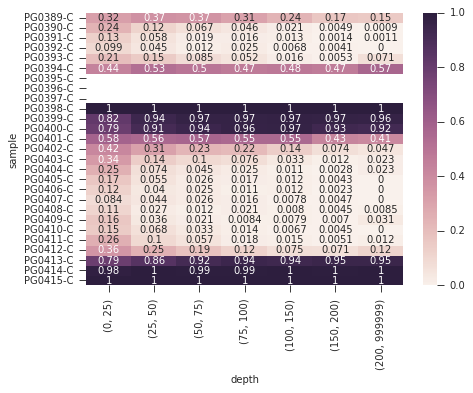

In [398]:
sns.heatmap(results_for_heatmap['SNP'].pivot(index='sample', columns='depth', values='FNR'), annot=True)

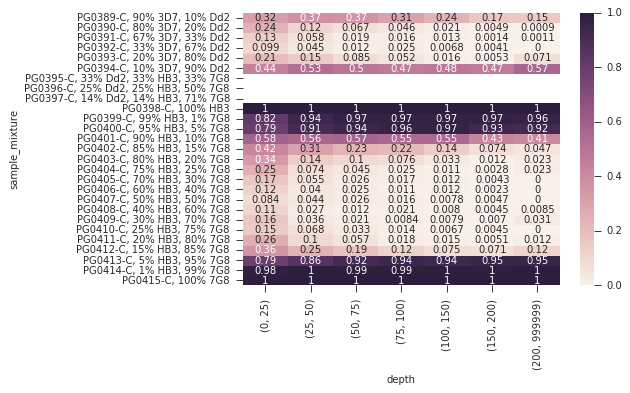

In [412]:
sns.heatmap(results_for_heatmap['SNP'].pivot(index='sample_mixture', columns='depth', values='FNR'), annot=True)

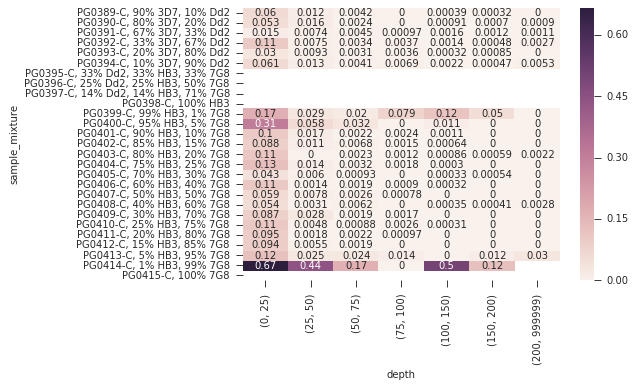

In [414]:
sns.heatmap(results_for_heatmap['SNP'].pivot(index='sample_mixture', columns='depth', values='FPR'), annot=True)

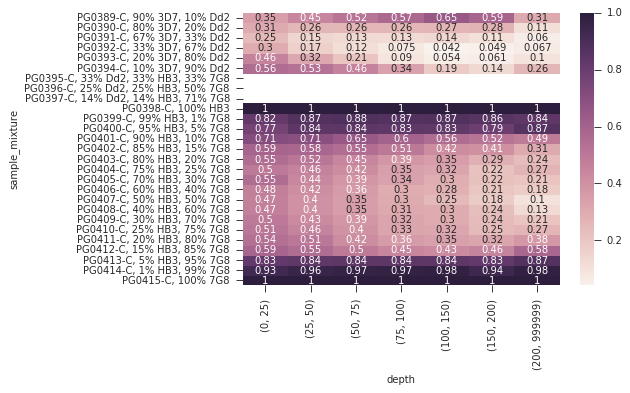

In [415]:
sns.heatmap(results_for_heatmap['INDEL'].pivot(index='sample_mixture', columns='depth', values='FNR'), annot=True)

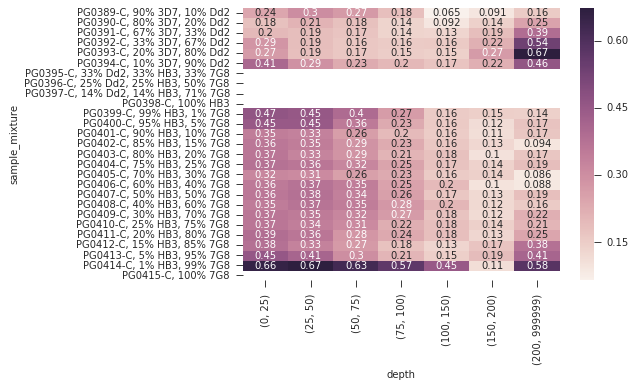

In [416]:
sns.heatmap(results_for_heatmap['INDEL'].pivot(index='sample_mixture', columns='depth', values='FPR'), annot=True)

In [379]:
pivot_results = results_for_heatmap.pivot(index='sample', columns='depth', values='FNR')
pivot_results

depth,"(0, 25)","(25, 50)","(50, 75)","(75, 100)","(100, 150)","(150, 200)","(200, 999999)"
sample,,,,,,,
PG0389-C,0.321739,0.373676,0.366222,0.306969,0.240000,0.167825,0.153846
PG0390-C,0.243386,0.116203,0.067039,0.046305,0.020945,0.004874,0.000900
PG0391-C,0.130719,0.057592,0.018764,0.016237,0.012800,0.001400,0.001099
PG0392-C,0.099174,0.044883,0.012318,0.024568,0.006762,0.004101,0.000000
PG0393-C,0.206478,0.152116,0.084666,0.052181,0.015834,0.005349,0.071038
PG0394-C,0.439024,0.527331,0.497420,0.470156,0.483434,0.467532,0.570115
PG0395-C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PG0396-C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PG0397-C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [332]:
results_for_heatmap.index.levels[0][results_for_heatmap.index.labels[0]]

Index(['PG0389-C', 'PG0389-C', 'PG0389-C', 'PG0389-C', 'PG0389-C', 'PG0389-C',
       'PG0389-C', 'PG0390-C', 'PG0390-C', 'PG0390-C',
       ...
       'PG0414-C', 'PG0414-C', 'PG0414-C', 'PG0415-C', 'PG0415-C', 'PG0415-C',
       'PG0415-C', 'PG0415-C', 'PG0415-C', 'PG0415-C'],
      dtype='object', name='sample', length=189)

In [319]:
type(results_for_heatmap)

pandas.core.series.Series

In [320]:
pd.DataFrame(df_results).pivot(index='sample', columns='depth', values='FNR')

KeyError: 'sample'

In [321]:
pd.DataFrame(df_results)

TP     FN    FP         FNR  \
sample   depth         variant_type                                   
PG0389-C (0, 25)       INDEL         12562   6784  4035    0.350667   
                       SNP              78     37     5    0.321739   
         (25, 50)      INDEL         12582  10190  5499    0.447479   
                       SNP             414    247     5    0.373676   
         (50, 75)      INDEL          6226   6723  2344    0.519191   
                       SNP             713    412     3    0.366222   
         (75, 100)     INDEL          3335   4477   748    0.573093   
                       SNP             885    392     0    0.306969   
         (100, 150)    INDEL          3705   6899   257    0.650604   
                       SNP            2546    804     1        0.24   
         (150, 200)    INDEL          1569   2283   158    0.592679   
                       SNP            3114    628     1    0.167825   
         (200, 999999) INDEL           198     89    37    0.310105   
                       SNP              88     16     0    0.153846   
PG0390-C (0, 25)       INDEL         16824   7493  3685    0.308138   
                       SNP             143     46     8    0.243386   
         (25, 50)      INDEL         14213   5016  3871    0.260856   
                       SNP             540     71     9    0.116203   
         (50, 75)      INDEL          8088   2872  1775    0.262044   
                       SNP             835     60     2   0.0670391   
         (75, 100)     INDEL          5009   1776   796    0.261754   
                       SNP             968     47     0   0.0463054   
         (100, 150)    INDEL          6524   2394   661    0.268446   
                       SNP            2197     47     2   0.0209447   
         (150, 200)    INDEL          4084   1560   671      0.2764   
                       SNP            4288     21     3  0.00487352   
         (200, 999999) INDEL          1572    197   531    0.111362   
                       SNP            1110      1     1  0.00090009   
PG0391-C (0, 25)       INDEL         14976   4962  3746    0.248872   
                       SNP             133     20     2    0.130719   
...                                    ...    ...   ...         ...   
PG0413-C (200, 999999) INDEL           154   1045   109     0.87156   
                       SNP              32    632     1    0.951807   
PG0414-C (0, 25)       INDEL          1844  23802  3518    0.928098   
                       SNP               8    444    16    0.982301   
         (25, 50)      INDEL           891  19718  1803    0.956766   
                       SNP               5   1475     4    0.996622   
         (50, 75)      INDEL           374  11749   626     0.96915   
                       SNP              10   1497     2    0.993364   
         (75, 100)     INDEL           180   6824   236      0.9743   
                       SNP               8   1232     0    0.993548   
         (100, 150)    INDEL           164   8375   134    0.980794   
                       SNP               1   2298     1    0.999565   
         (150, 200)    INDEL           233   3432    29    0.936426   
                       SNP               7   1649     1    0.995773   
         (200, 999999) INDEL            22   1044    31    0.979362   
                       SNP               0    505     0           1   
PG0415-C (0, 25)       INDEL             0  26880     0           1   
                       SNP               0    433     0           1   
         (25, 50)      INDEL             0  21369     0           1   
                       SNP               0   1590     0           1   
         (50, 75)      INDEL             0  12421     0           1   
                       SNP               0   1670     0           1   
         (75, 100)     INDEL             0   7332     0           1   
                       SNP               0   1536     0         

In [118]:
depths = [(0, 25), (25, 50), (50, 75), (75, 100), (100, 150), (150, 200), (200, 999999)]

df_results = pd.DataFrame({'sample' : [], '3D7': [], 'Dd2': [], 'HB3': [], '7G8': []})

for variant_type in ['SNP', 'INDEL']:
    if variant_type == 'SNP':
        variants_this_type = callset['variants']['is_snp'][:]
    else:
        variants_this_type = np.logical_not(callset['variants']['is_snp'][:])
    for sample in tbl_mixtures.values('sample'):
        for depth in depths:
            variants=(
                variants_this_type &
                callset['variants']['FILTER_PASS'][:] &
                (dps[sample] >= depth[0]) &
                (dps[sample] < depth[1])
            )
            rec_this_sample, TP, FN, FP = determine_tp_fn_fp(sample, variants)
            if (FN+TP) == 0:
                FNR = np.nan
            else:
                FNR = FN/(FN+TP)
            if (FP+TP) == 0:
                FPR = np.nan
            else:
                FPR = FP/(FP+TP)
#             print(sample, rec_this_sample[2], rec_this_sample[3], rec_this_sample[4], rec_this_sample[5],
#                   variant_type, depth, TP, FN, FP)
            print(sample, rec_this_sample[2], rec_this_sample[3], rec_this_sample[4], rec_this_sample[5],
                  variant_type, depth, TP, FN, FP, FNR, FPR)
        

PG0389-C 90 10 0 0 SNP (0, 25) 78 37 5 0.3217391304347826 0.060240963855421686
PG0389-C 90 10 0 0 SNP (25, 50) 414 247 5 0.37367624810892586 0.011933174224343675
PG0389-C 90 10 0 0 SNP (50, 75) 713 412 3 0.3662222222222222 0.004189944134078212
PG0389-C 90 10 0 0 SNP (75, 100) 885 392 0 0.3069694596711042 0.0
PG0389-C 90 10 0 0 SNP (100, 150) 2546 804 1 0.24 0.00039261876717707107
PG0389-C 90 10 0 0 SNP (150, 200) 3114 628 1 0.16782469267771247 0.00032102728731942215
PG0389-C 90 10 0 0 SNP (200, 999999) 88 16 0 0.15384615384615385 0.0
PG0390-C 80 20 0 0 SNP (0, 25) 143 46 8 0.24338624338624337 0.052980132450331126
PG0390-C 80 20 0 0 SNP (25, 50) 540 71 9 0.11620294599018004 0.01639344262295082
PG0390-C 80 20 0 0 SNP (50, 75) 835 60 2 0.0670391061452514 0.0023894862604540022
PG0390-C 80 20 0 0 SNP (75, 100) 968 47 0 0.04630541871921182 0.0
PG0390-C 80 20 0 0 SNP (100, 150) 2197 47 2 0.02094474153297683 0.0009095043201455207
PG0390-C 80 20 0 0 SNP (150, 200) 4288 21 3 0.004873520538407983

In [123]:
df_results = pd.DataFrame({'sample' : [], '3D7': [], 'Dd2': [], 'HB3': [], '7G8': []})
df_results = df_results.append(['PG0415-C', 0, 0, 0, 100])
df_results

,3D7,7G8,Dd2,HB3,sample,0
0,NaN,NaN,NaN,NaN,NaN,PG0415-C
1,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,100


In [152]:
x = {'sample': tbl_mixtures.values('sample').list(), 'depth': depths, 'variant_type': ['SNP', 'INDEL']}
df_results = pd.DataFrame(index=list(itertools.product(*x.values())), columns=['TP', 'FN', 'FP', 'FNR', 'FPR'])

In [210]:
str(depths)

'[(0, 25), (25, 50), (50, 75), (75, 100), (100, 150), (150, 200), (200, 999999)]'

In [300]:
df_results = pd.DataFrame(
    index=pd.MultiIndex.from_product(
#         [tbl_mixtures.values('sample').list(), [str(x) for x in depths], ['SNP', 'INDEL']],
        [tbl_mixtures.values('sample').list(), depths, ['SNP', 'INDEL']],
        names=['sample', 'depth', 'variant_type']
    ),
    columns=['TP', 'FN', 'FP', 'FNR', 'FPR']
)
df_results = df_results.sort_index()

In [302]:
df_results.loc['PG0389-C', (0, 25), 'SNP'] = (1, 23, 4, 5, 3)

In [303]:
df_results.loc['PG0389-C', (0, 25), 'SNP']

TP      1.0
FN     23.0
FP      4.0
FNR     5.0
FPR     3.0
Name: (PG0389-C, (0, 25), SNP), dtype: float64

In [304]:
df_results

TP    FN   FP  FNR  FPR
sample   depth         variant_type                          
PG0389-C (0, 25)       INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           1.0  23.0  4.0  5.0  3.0
         (25, 50)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (50, 75)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (75, 100)     INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (100, 150)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (150, 200)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (200, 999999) INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
PG0390-C (0, 25)       INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (25, 50)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (50, 75)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (75, 100)     INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (100, 150)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (150, 200)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (200, 999999) INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
PG0391-C (0, 25)       INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
...                                  ...   ...  ...  ...  ...
PG0413-C (200, 999999) SNP           NaN   NaN  NaN  NaN  NaN
PG0414-C (0, 25)       INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (25, 50)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (50, 75)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (75, 100)     INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (100, 150)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (150, 200)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (200, 999999) INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
PG0415-C (0, 25)       INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (25, 50)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (50, 75)      INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (75, 100)     INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (100, 150)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (150, 200)    INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
         (200, 999999) INDEL         NaN   NaN  NaN  NaN  NaN
                       SNP           NaN   NaN  NaN  NaN  NaN
PG0389-C (0, 25)       SNP           1.0  23.0  4.0  5.0  3.0

[379 rows x 5 columns]

In [250]:
df_results.loc[[('PG0389-C', '(0,25)', 'SNP')], 'TP'] = 1

KeyError: "[('PG0389-C', '(0,25)', 'SNP')] not in index"

In [158]:
df_results.index[0][2]

'SNP'

In [212]:
df_results.keys

<bound method NDFrame.keys of                                       TP   FN   FP  FNR  FPR
sample   depth         variant_type                         
PG0389-C (0, 25)       SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (25, 50)      SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (50, 75)      SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (75, 100)     SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (100, 150)    SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (150, 200)    SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (200, 999999) SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN

In [213]:
df_results.loc[['PG0390-C', '(50,75)'], :]

TP   FN   FP  FNR  FPR
sample   depth         variant_type                         
PG0390-C (0, 25)       SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (25, 50)      SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (50, 75)      SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (75, 100)     SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (100, 150)    SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (150, 200)    SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (200, 999999) SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN

In [214]:
df_results.loc[('PG0390-C', '(50,75)'), :]

/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/pandas/core/indexing.py:1309: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


KeyError: '(50,75)'

In [208]:
df_results.loc[['PG0390-C'], :]

TP   FN   FP  FNR  FPR
sample   depth         variant_type                         
PG0390-C (0, 25)       SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (25, 50)      SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (50, 75)      SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (75, 100)     SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (100, 150)    SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (150, 200)    SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN
         (200, 999999) SNP           NaN  NaN  NaN  NaN  NaN
                       INDEL         NaN  NaN  NaN  NaN  NaN

In [187]:
df_results.loc[('PG0390-C', '(0,25)')]

KeyError: 'the label [(0,25)] is not in the [columns]'

In [186]:
df_results.loc['PG0390-C']

TP   FN   FP  FNR  FPR
depth         variant_type                         
(0, 25)       SNP           NaN  NaN  NaN  NaN  NaN
              INDEL         NaN  NaN  NaN  NaN  NaN
(25, 50)      SNP           NaN  NaN  NaN  NaN  NaN
              INDEL         NaN  NaN  NaN  NaN  NaN
(50, 75)      SNP           NaN  NaN  NaN  NaN  NaN
              INDEL         NaN  NaN  NaN  NaN  NaN
(75, 100)     SNP           NaN  NaN  NaN  NaN  NaN
              INDEL         NaN  NaN  NaN  NaN  NaN
(100, 150)    SNP           NaN  NaN  NaN  NaN  NaN
              INDEL         NaN  NaN  NaN  NaN  NaN
(150, 200)    SNP           NaN  NaN  NaN  NaN  NaN
              INDEL         NaN  NaN  NaN  NaN  NaN
(200, 999999) SNP           NaN  NaN  NaN  NaN  NaN
              INDEL         NaN  NaN  NaN  NaN  NaN

In [184]:
df_results.loc[('PG0390-C', (0,25, 'SNP'), :]

IndexError: list index out of range

In [119]:
dps['PG0389-C'] <= 50

array([ True, False, False, ..., False, False, False], dtype=bool)

In [108]:
print(determine_tp_fn_fp())
print(determine_tp_fn_fp('PG0392-C'))
print(determine_tp_fn_fp('PG0395-C'))
print(determine_tp_fn_fp('PG0406-C'))


PG0389-C 3D7vDd2
(array([False,  True], dtype=bool), array([4047679,  164786]))
(511, 294, 11)
PG0392-C 3D7vDd2
(array([False,  True], dtype=bool), array([4047679,  164786]))
(762, 43, 10)
(nan, nan, nan)
PG0406-C HB3v7G8
(array([False,  True], dtype=bool), array([4047679,  164786]))
(1087, 39, 6)


In [34]:
for sample in tbl_mixtures.values('sample').array():
    print(
        sample,
        np.unique(
            correct_het_call['3D7vDd2'][segregating_variants['3D7vDd2']] == gts[sample][segregating_variants['3D7vDd2']],
            return_counts=True
        )
    )


PG0389-C (array([False,  True], dtype=bool), array([68535, 51765]))
PG0390-C (array([False,  True], dtype=bool), array([46064, 74236]))
PG0391-C (array([False,  True], dtype=bool), array([34061, 86239]))
PG0392-C (array([False,  True], dtype=bool), array([27786, 92514]))
PG0393-C (array([False,  True], dtype=bool), array([37169, 83131]))
PG0394-C (array([False,  True], dtype=bool), array([53844, 66456]))
PG0395-C (array([False,  True], dtype=bool), array([69426, 50874]))
PG0396-C (array([False,  True], dtype=bool), array([72346, 47954]))
PG0397-C (array([False,  True], dtype=bool), array([79605, 40695]))
PG0398-C (array([False,  True], dtype=bool), array([116275,   4025]))
PG0399-C (array([False,  True], dtype=bool), array([112956,   7344]))
PG0400-C (array([False,  True], dtype=bool), array([111466,   8834]))
PG0401-C (array([False,  True], dtype=bool), array([107142,  13158]))
PG0402-C (array([False,  True], dtype=bool), array([102638,  17662]))
PG0403-C (array([False,  True], dtype=

In [20]:
(gts['3D7'] != gts['Dd2']).shape

(4212465, 1)

In [19]:
np.in1d(gts['3D7'], homozygous_calls).shape

(4212465,)

In [17]:
np.unique(gts['7G8'], return_counts=True)

(array([b'./.', b'0/0', b'0/1', b'0/2', b'0/3', b'0/4', b'0/5', b'0/6',
        b'1/1', b'1/2', b'1/3', b'1/4', b'1/5', b'1/6', b'2/2', b'2/3',
        b'2/4', b'2/5', b'2/6', b'3/3', b'3/4', b'3/5', b'3/6', b'4/4',
        b'4/5', b'4/6', b'5/5', b'5/6', b'6/6'], 
       dtype='|S3'),
 array([ 493826, 3511792,   48891,   14570,    4121,    1336,     527,
            160,  100542,    2296,     687,     294,     136,      33,
          21290,     782,     289,     110,      24,    5675,     574,
            176,      29,    2355,     338,      55,    1045,     106,
            406]))

In [ ]:
segregating_variants = collections.OrderedDict()
